# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **São Paulo, Sao Paulo, Brazil**, or **Brazil** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **São Paulo, Sao Paulo, Brazil** to Ann Arbor, USA. In that case at least one source file must be about **São Paulo, Sao Paulo, Brazil**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **São Paulo, Sao Paulo, Brazil** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Procesamiento de los datos

Seleccion de los datos de Sur America

In [328]:


import pandas as pd
import zipfile 

with zipfile.ZipFile('owid-covid-data.zip', mode='r', allowZip64=True) as zip_ref: 

    zip_ref.extractall()
data_frame=pd.read_csv('owid-covid-data.csv')
data_frame

for continente in data_frame.groupby('continent'):
    if continente[0]=='South America':
        South_America_df=continente[1]
South_America_df.dtypes


iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Seleccion de datos de Brasil

In [329]:
df=pd.read_csv('/home/jovyan/work/owid-covid-data.csv')
df=df.iloc[ :, :6]
df['Month-Day'] = df.apply(lambda row:'-'.join(row['date'].split('-')[1:]),axis=1)
for casos in df.groupby('location'):
    if casos[0]=='Brazil':
        Casos_Brasil=casos[1]
Casos_Brasil.dtypes

iso_code        object
continent       object
location        object
date            object
total_cases    float64
new_cases      float64
Month-Day       object
dtype: object

Seleccion de datos de São Paulo

In [330]:
ddf= pd.read_csv('cases-brazil-states.csv')

ddf['Month-Day'] = ddf.apply(lambda row:'-'.join(row['date'].split('-')[1:]),axis=1)

sao_paulo=ddf[ddf['state']=='SP']

total=ddf[ddf['state']=='TOTAL']


Seleccion de el numero de camas disponibles en São paulo

In [331]:
LEITOS = pd.read_csv('plano_sp_leitos_internacoes_serie_nova_variacao_semanal.csv', sep=';',encoding='latin-1')
LEITOS['Month-Day'] = LEITOS.apply(lambda row:'-'.join(row['datahora'].split('-')[1:]),axis=1)

for leitos in LEITOS.groupby('nome_drs'):
    leitos
Leitos=leitos[1].rename(columns={'datahora':'date'})
Leitos.dtypes



date                          object
nome_drs                      object
pacientes_uti_mm7d            object
total_covid_uti_mm7d          object
ocupacao_leitos               object
pop                            int64
leitos_pc                     object
internacoes_7d                 int64
internacoes_7d_l               int64
internacoes_7v7               object
pacientes_uti_ultimo_dia       int64
total_covid_uti_ultimo_dia     int64
ocupacao_leitos_ultimo_dia    object
internacoes_ultimo_dia         int64
pacientes_enf_mm7d            object
total_covid_enf_mm7d          object
pacientes_enf_ultimo_dia       int64
total_covid_enf_ultimo_dia     int64
Month-Day                     object
dtype: object

Casos de Sao paulo vs Camas de hospital

In [332]:
sao_paulo_vs_leitos = Leitos.merge(sao_paulo, on='date') 
sao_paulo_vs_leitos

Casos_Brasil_vs_South_America=Casos_Brasil.merge(South_America_df, on = 'date')
Casos_Brasil_vs_South_America

,iso_code_x,continent_x,location_x,date,total_cases_x,new_cases_x,Month-Day,iso_code_y,continent_y,location_y,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,02-26,ARG,South America,Argentina,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
1,BRA,South America,Brazil,2020-02-26,1.0,1.0,02-26,BRA,South America,Brazil,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
2,BRA,South America,Brazil,2020-02-26,1.0,1.0,02-26,CHL,South America,Chile,...,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,NaN
3,BRA,South America,Brazil,2020-02-26,1.0,1.0,02-26,PER,South America,Peru,...,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,NaN
4,BRA,South America,Brazil,2020-02-27,1.0,0.0,02-27,ARG,South America,Argentina,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
5,BRA,South America,Brazil,2020-02-27,1.0,0.0,02-27,BRA,South America,Brazil,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
6,BRA,South America,Brazil,2020-02-27,1.0,0.0,02-27,CHL,South America,Chile,...,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,NaN
7,BRA,South America,Brazil,2020-02-27,1.0,0.0,02-27,PER,South America,Peru,...,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,NaN
8,BRA,South America,Brazil,2020-02-28,1.0,0.0,02-28,ARG,South America,Argentina,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
9,BRA,South America,Brazil,2020-02-28,1.0,0.0,02-28,BRA,South America,Brazil,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN


# Visualizacion de los datos

Datos de cada estado de São Paulo

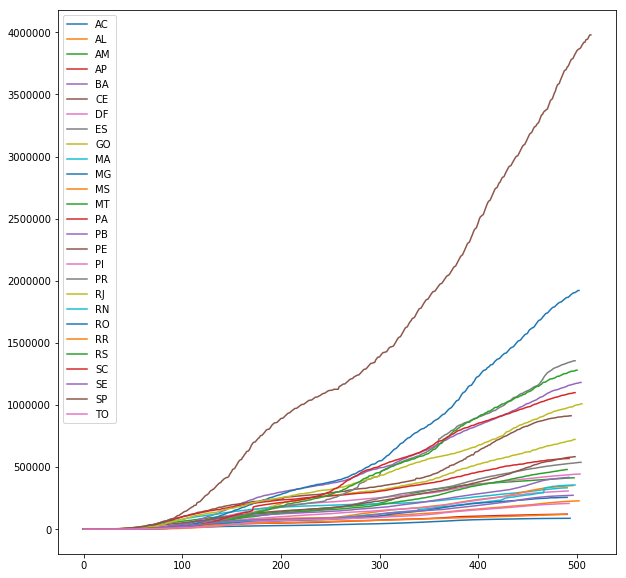

In [333]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for casos in ddf.groupby('state'):
    if casos[0]=='TOTAL':
        break
    ax = plt.gca()
    #color='#00AA00'
    plt.plot(casos[1]["totalCases"].values, label =casos[0])

    #color=hex(color+'ff')
#plt.plot(casos_brasil['total_cases'].values,label='casos totales brasil')
plt.legend(loc='upper left')

Casos de São paulo vs Camas de Hospital

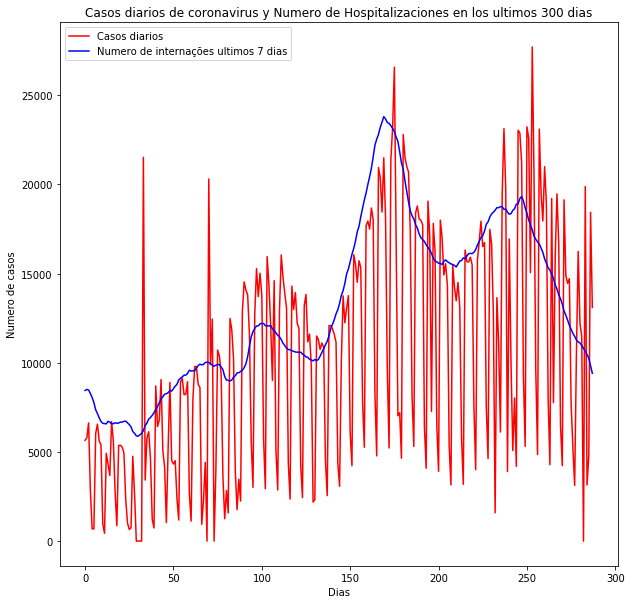

In [342]:
plt.figure(figsize=(10,10))
plt.plot(sao_paulo_vs_leitos["newCases"].values, c = 'red', label ='Casos diarios')
plt.plot(Leitos["internacoes_7d"].values, c = 'blue', label ='Numero de internações ultimos 7 dias')
plt.legend()
plt.title('Casos diarios de coronavirus y Numero de Hospitalizaciones en los ultimos 300 dias')
plt.xlabel('Dias')
plt.ylabel('Numero de casos')

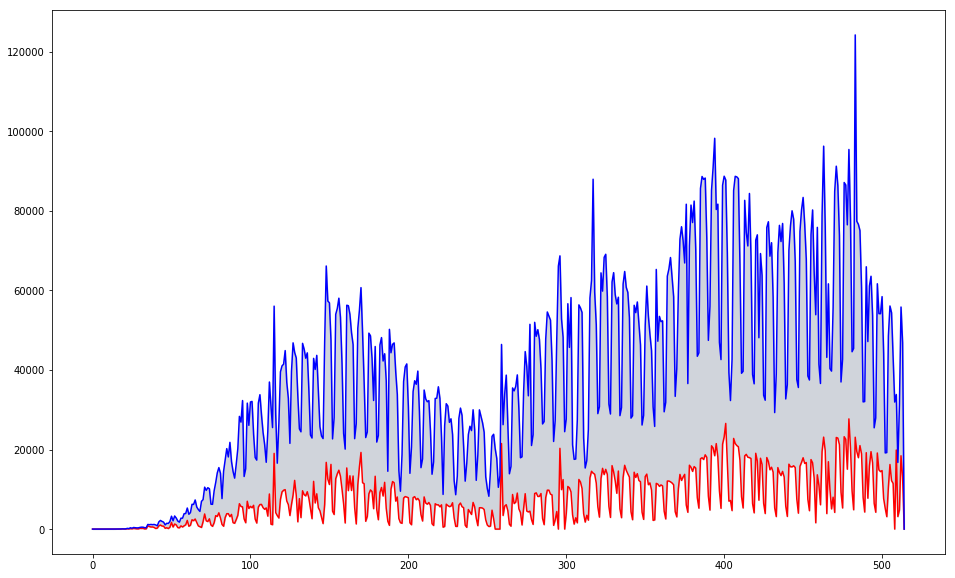

In [335]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
ax = plt.gca()
plt.plot(sao_paulo["newCases"].values, c = 'red', label ='Casos diarios de São Paulo')
plt.plot(total["newCases"].values, c = 'blue', label ='Casos Diarios Brasil')
plt.fill_between([x for x in range(0, len(total))],total["newCases"].values, sao_paulo["newCases"].values, color='#d0d4db')

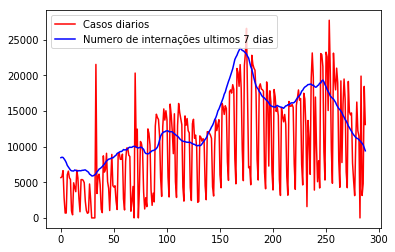

In [247]:
plt.plot(sao_paulo_vs_leitos["newCases"].values, c = 'red', label ='Casos diarios')
plt.plot(leitos[1]["internacoes_7d"].values, c = 'blue', label ='Numero de internações ultimos 7 dias')
plt.legend()
#plt.fill_between([x for x in range(0, len(total))],total["newCases"].values, sao_paulo["newCases"].values, color='#d0d4db')
